# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
# Import the titanic dataset here
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [10]:
# Code here
df_passengers = df_titanic[df_titanic['class'].isin(["1st", "2nd", "3rd"])]
# df_passengers = df_titanic[df_titanic["fare"] > 0]
joint_dist = pd.crosstab(df_passengers['class'], df_passengers['embarked'])
joint_dist

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [15]:
# Code here
class_given_embarked = df_passengers.groupby("class")["embarked"].value_counts(normalize = True)
embarked_given_class = df_passengers.groupby("embarked")["class"].value_counts(normalize = True)
print(class_given_embarked)
print(embarked_given_class)

# about 70% of the 3rd class passengers embarked at Southampton
# about 54% of Southampton passengers were in 3rd class

class  embarked
1st    S           0.540123
       C           0.441358
       B           0.009259
       Q           0.009259
2nd    S           0.862676
       C           0.091549
       Q           0.024648
       B           0.021127
3rd    S           0.696756
       Q           0.159379
       C           0.143865
Name: proportion, dtype: float64
embarked  class
B         2nd      0.666667
          1st      0.333333
C         1st      0.527675
          3rd      0.376384
          2nd      0.095941
Q         3rd      0.918699
          2nd      0.056911
          1st      0.024390
S         3rd      0.540481
          2nd      0.268053
          1st      0.191466
Name: proportion, dtype: float64


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

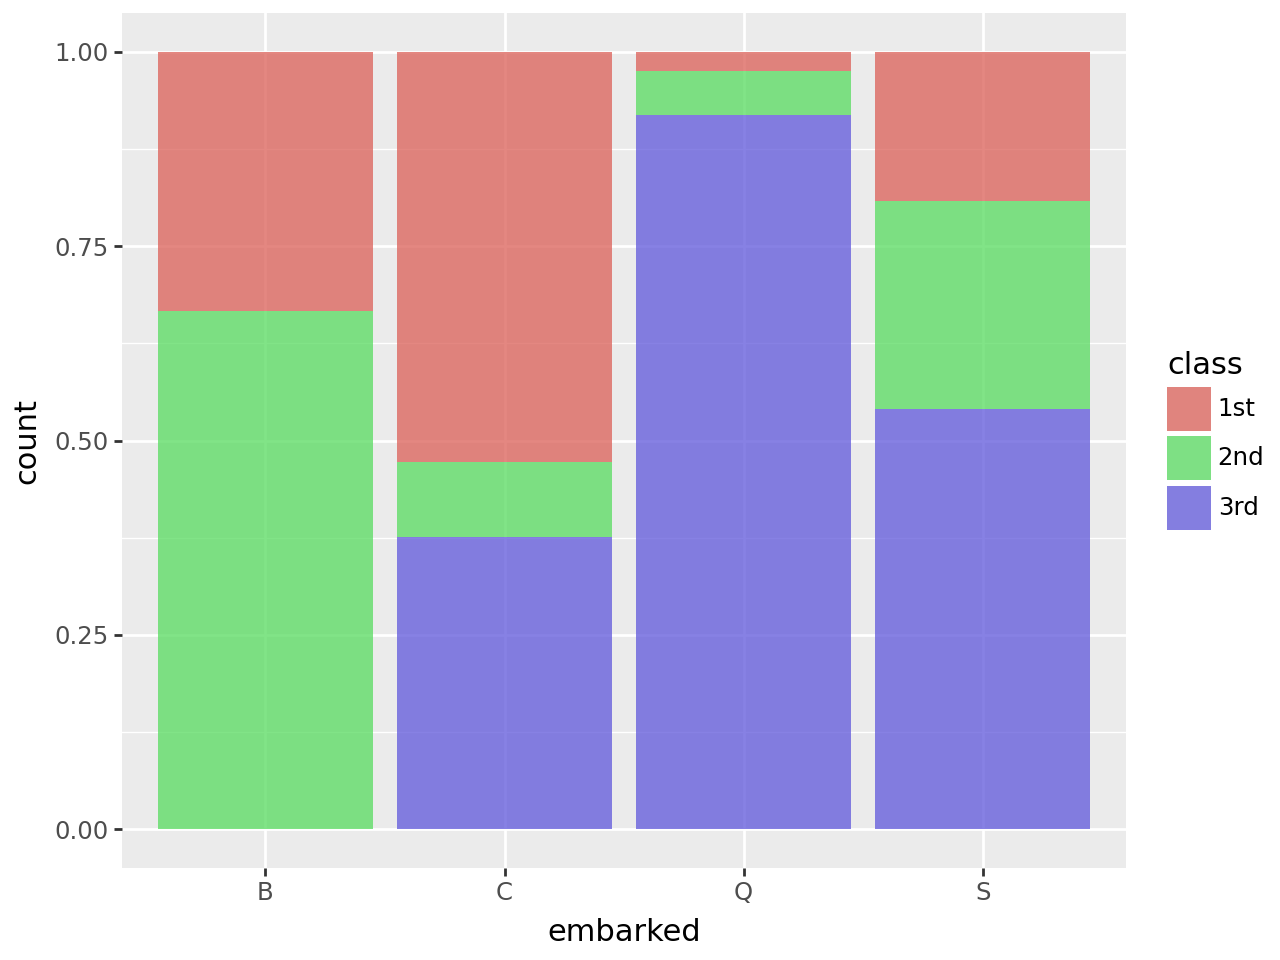

In [21]:
# Code here
from plotnine import ggplot, geom_bar, aes

(ggplot(df_passengers, aes(x = "embarked", fill = "class"))
+ geom_bar(alpha = 0.75, position = "fill"))